<a href="https://colab.research.google.com/github/pserpaschiavo/svc-degradation-detection/blob/main/SFI2_Correla%C3%A7%C3%B5es_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Bibliotecas Necessárias

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr, kendalltau

## Montagem dos Dataframes

In [14]:
unloaded_df = pd.read_csv("https://raw.githubusercontent.com/pserpaschiavo/svc-degradation-detection/refs/heads/main/python/datasets/unloaded-concorrencia-long.csv", low_memory=False)

unloaded_df.head()

,time,sent,received,latency_min,latency_median,latency_75th,latency_95th,latency_99th
0,3.0,5003,5002,112,463,2074,7775,18691
1,4.0,4999,5001,122,308,1567,13582,29517
2,5.0,5005,5005,109,305,1121,6012,9508
3,6.0,5001,4996,119,633,1800,10002,18919
4,7.0,5005,5008,122,543,1352,8810,13233


In [15]:
loaded_df = pd.read_csv("https://raw.githubusercontent.com/pserpaschiavo/svc-degradation-detection/refs/heads/main/python/datasets/loaded-concorrencia-long.csv", low_memory=False)

loaded_df.head()

,time,sent,received,latency_min,latency_median,latency_75th,latency_95th,latency_99th
0,3.0,3006,3006,116,216,291,808,5917
1,4.0,3003,3003,119,181,255,720,2043
2,5.0,3005,3006,120,195,267,550,1127
3,6.0,3004,3003,117,179,258,618,5227
4,7.0,3003,3003,120,186,282,606,1493


In [16]:
unloaded_df.latency_median = pd.to_numeric(unloaded_df.latency_median, errors='coerce').fillna(0).astype(int)
unloaded_df.received = pd.to_numeric(unloaded_df.received, errors='coerce').fillna(0).astype(int)
unloaded_df.sent = pd.to_numeric(unloaded_df.sent, errors='coerce').fillna(0).astype(int)
unloaded_df.time = pd.to_numeric(unloaded_df.time, errors='coerce').fillna(0).astype(int)

unloaded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86393 entries, 0 to 86392
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   time            86393 non-null  int64
 1   sent            86393 non-null  int64
 2   received        86393 non-null  int64
 3   latency_min     86393 non-null  int64
 4   latency_median  86393 non-null  int64
 5   latency_75th    86393 non-null  int64
 6   latency_95th    86393 non-null  int64
 7   latency_99th    86393 non-null  int64
dtypes: int64(8)
memory usage: 5.3 MB


In [17]:
loaded_df.latency_median = pd.to_numeric(loaded_df.latency_median, errors='coerce').fillna(0).astype(int)
loaded_df.received = pd.to_numeric(loaded_df.received, errors='coerce').fillna(0).astype(int)
loaded_df.sent = pd.to_numeric(loaded_df.sent, errors='coerce').fillna(0).astype(int)
loaded_df.time = pd.to_numeric(loaded_df.time, errors='coerce').fillna(0).astype(int)

loaded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86393 entries, 0 to 86392
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   time            86393 non-null  int64
 1   sent            86393 non-null  int64
 2   received        86393 non-null  int64
 3   latency_min     86393 non-null  int64
 4   latency_median  86393 non-null  int64
 5   latency_75th    86393 non-null  int64
 6   latency_95th    86393 non-null  int64
 7   latency_99th    86393 non-null  int64
dtypes: int64(8)
memory usage: 5.3 MB


In [18]:
print(unloaded_df.shape)
print(loaded_df.shape)

(86393, 8)
(86393, 8)


In [19]:
unloaded_df = unloaded_df.drop_duplicates()
loaded_df = loaded_df.drop_duplicates()

unloaded_df = unloaded_df.reset_index(drop=True)
loaded_df = loaded_df.reset_index(drop=True)

print(unloaded_df.shape)
print(loaded_df.shape)

(57595, 8)
(57595, 8)


In [20]:
print(unloaded_df.time.isna().sum())
print(unloaded_df.latency_median.isna().sum())
print(np.isinf(unloaded_df.time).sum())
print(np.isinf(unloaded_df.latency_median).sum())

0
0
0
0


In [21]:
print(loaded_df.time.isna().sum())
print(loaded_df.latency_median.isna().sum())
print(np.isinf(loaded_df.time).sum())
print(np.isinf(loaded_df.latency_median).sum())

0
0
0
0


In [22]:
unloaded_df.columns

Index(['time', 'sent', 'received', 'latency_min', 'latency_median',
       'latency_75th', 'latency_95th', 'latency_99th'],
      dtype='object')

In [23]:
unloaded_df = unloaded_df.drop(columns=['latency_min','latency_75th', 'latency_95th', 'latency_99th'])

unloaded_df.time = unloaded_df.time - 2

unloaded_df.head()

,time,sent,received,latency_median
0,1,5003,5002,463
1,2,4999,5001,308
2,3,5005,5005,305
3,4,5001,4996,633
4,5,5005,5008,543


In [24]:
loaded_df = loaded_df.drop(columns=['latency_min','latency_75th', 'latency_95th', 'latency_99th'])

loaded_df.time = loaded_df.time - 2

loaded_df.head()

,time,sent,received,latency_median
0,1,3006,3006,216
1,2,3003,3003,181
2,3,3005,3006,195
3,4,3004,3003,179
4,5,3003,3003,186


In [25]:
unloaded_df.columns = ['time', 'sent', 'received', 'latency']
loaded_df.columns = ['time', 'sent', 'received', 'latency']

In [26]:
unloaded = unloaded_df.latency
loaded = loaded_df.latency
time = unloaded.index

In [27]:
unloaded.head()

,latency
0,463
1,308
2,305
3,633
4,543


In [28]:
loaded.head()

,latency
0,216
1,181
2,195
3,179
4,186


In [29]:
time

RangeIndex(start=0, stop=57595, step=1)

In [30]:
print(type(unloaded))
print(type(loaded))
print(type(time))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.indexes.range.RangeIndex'>


In [31]:
print(unloaded.shape)
print(loaded.shape)
print(time.shape)

(57595,)
(57595,)
(57595,)


### Gráficos

In [32]:
def plot_series(time, series, format="-", start=0, end=None):
    """
    Visualizes time series data

    Args:
      time (array of int) - contains the time steps
      series (array of int) - contains the measurements for each time step
      format - line style when plotting the graph
      start - first time step to plot
      end - last time step to plot
    """

    # Setup dimensions of the graph figure
    plt.figure(figsize=(21, 7))

    if type(series) is tuple:

      for series_num in series:
        # Plot the time series data
        plt.plot(time[start:end], series_num[start:end], format)

    else:
      # Plot the time series data
      plt.plot(time[start:end], series[start:end], format)

    # Label the x-axis
    plt.xlabel("Time")

    # Label the y-axis
    plt.ylabel("Value")

    # Overlay a grid on the graph
    plt.grid(True)

    # Draw the graph on screen
    plt.show()

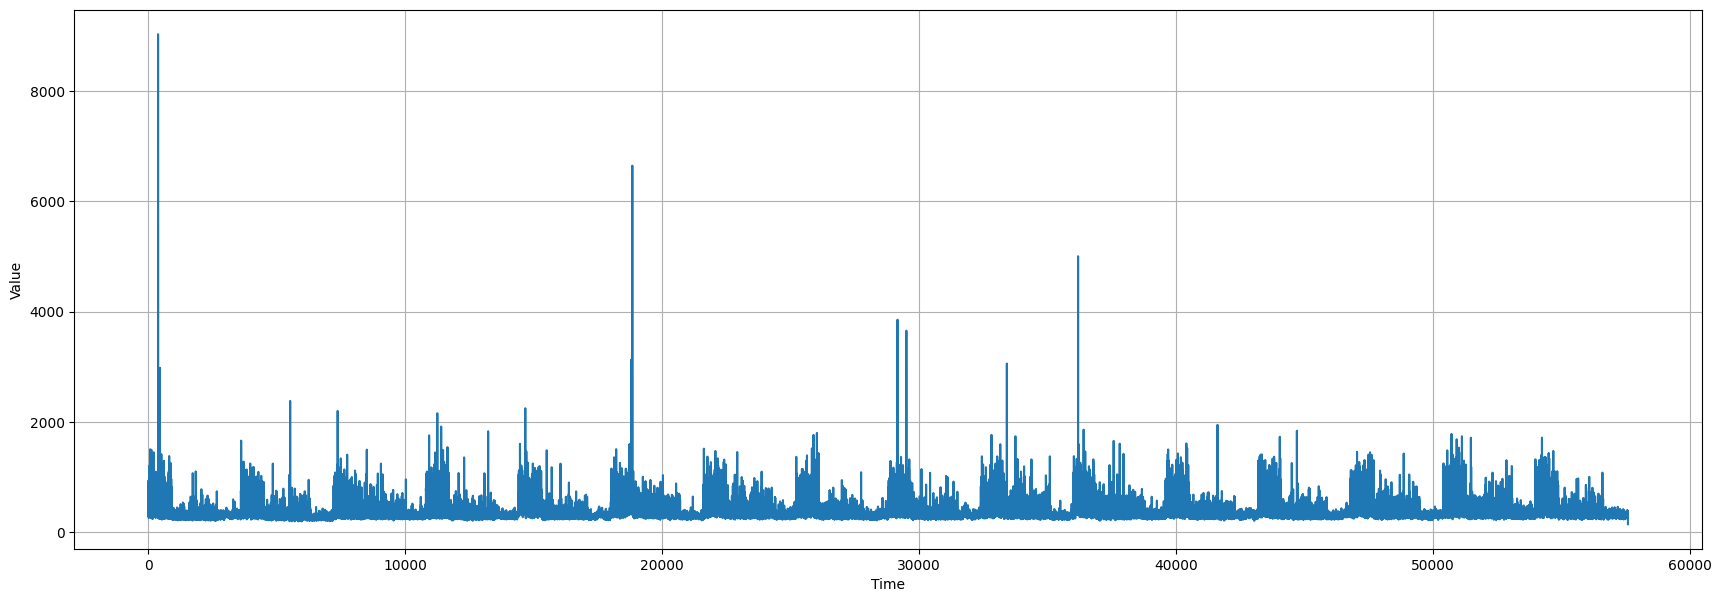

In [33]:
plot_series(time, unloaded)

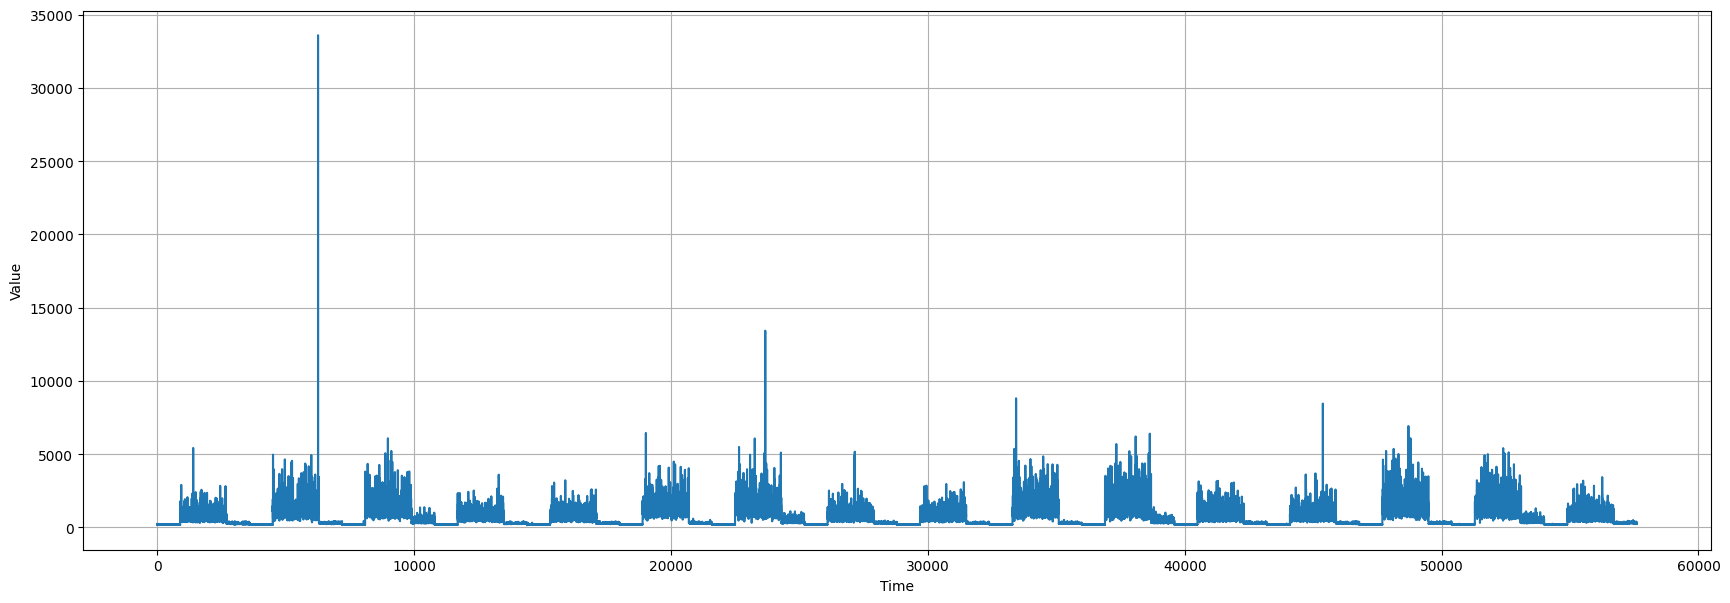

In [34]:
plot_series(loaded.index, loaded)

## Correlação

In [35]:
# Calcular a correlação de Pearson
correlation, p_value = pearsonr(unloaded, loaded)
print(f"Correlação de Pearson: {correlation:.2f}")
print(f"Valor-p: {p_value:.4f}")

Correlação de Pearson: -0.18
Valor-p: 0.0000


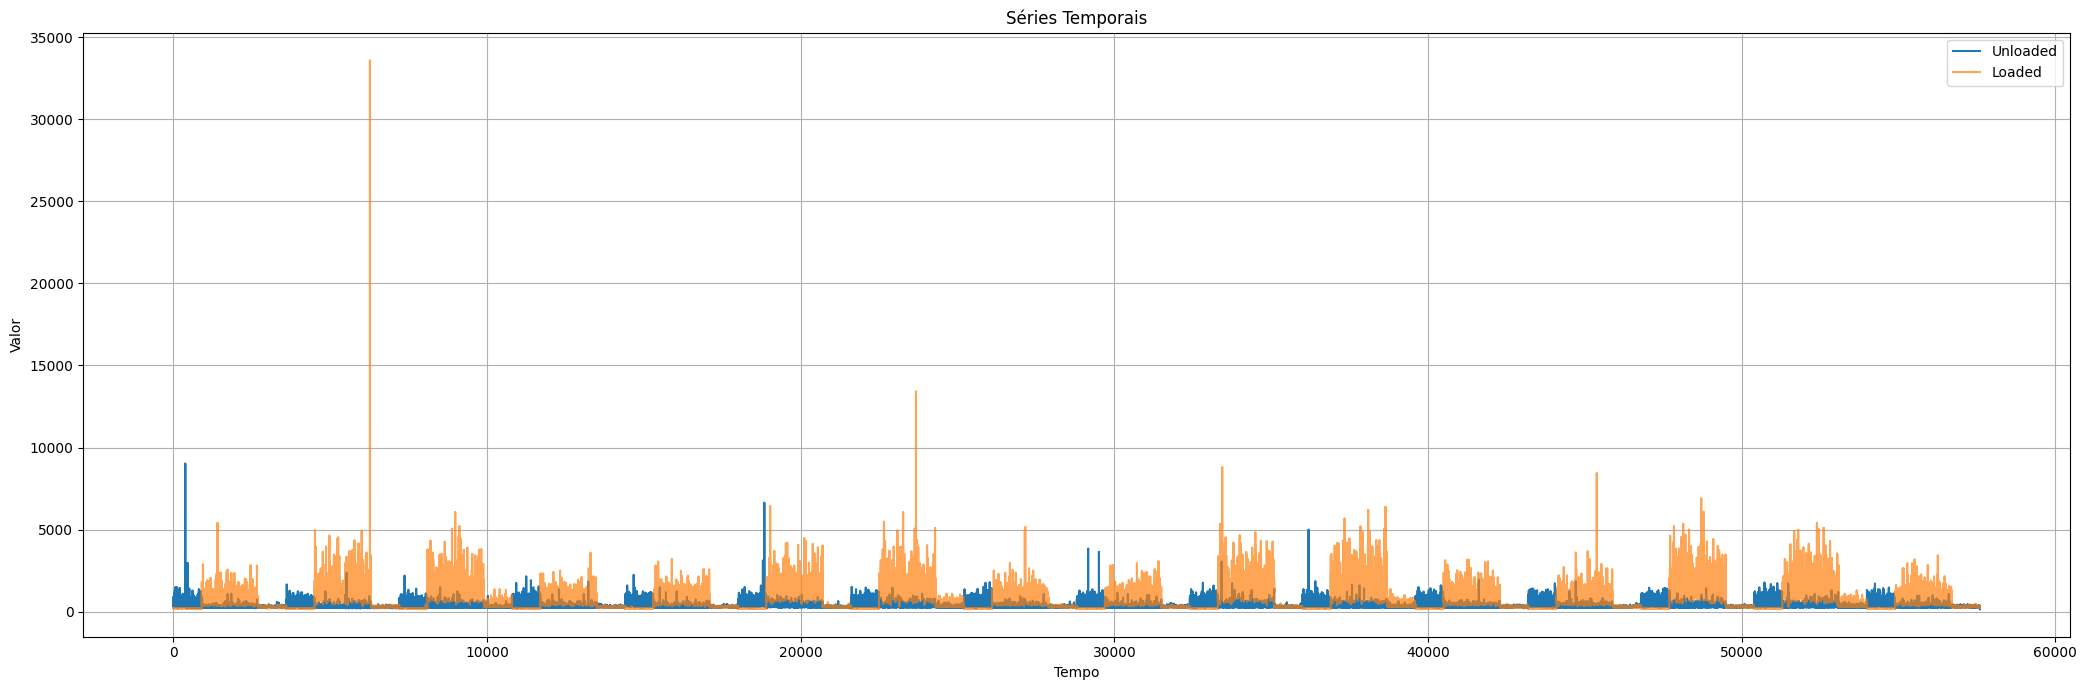

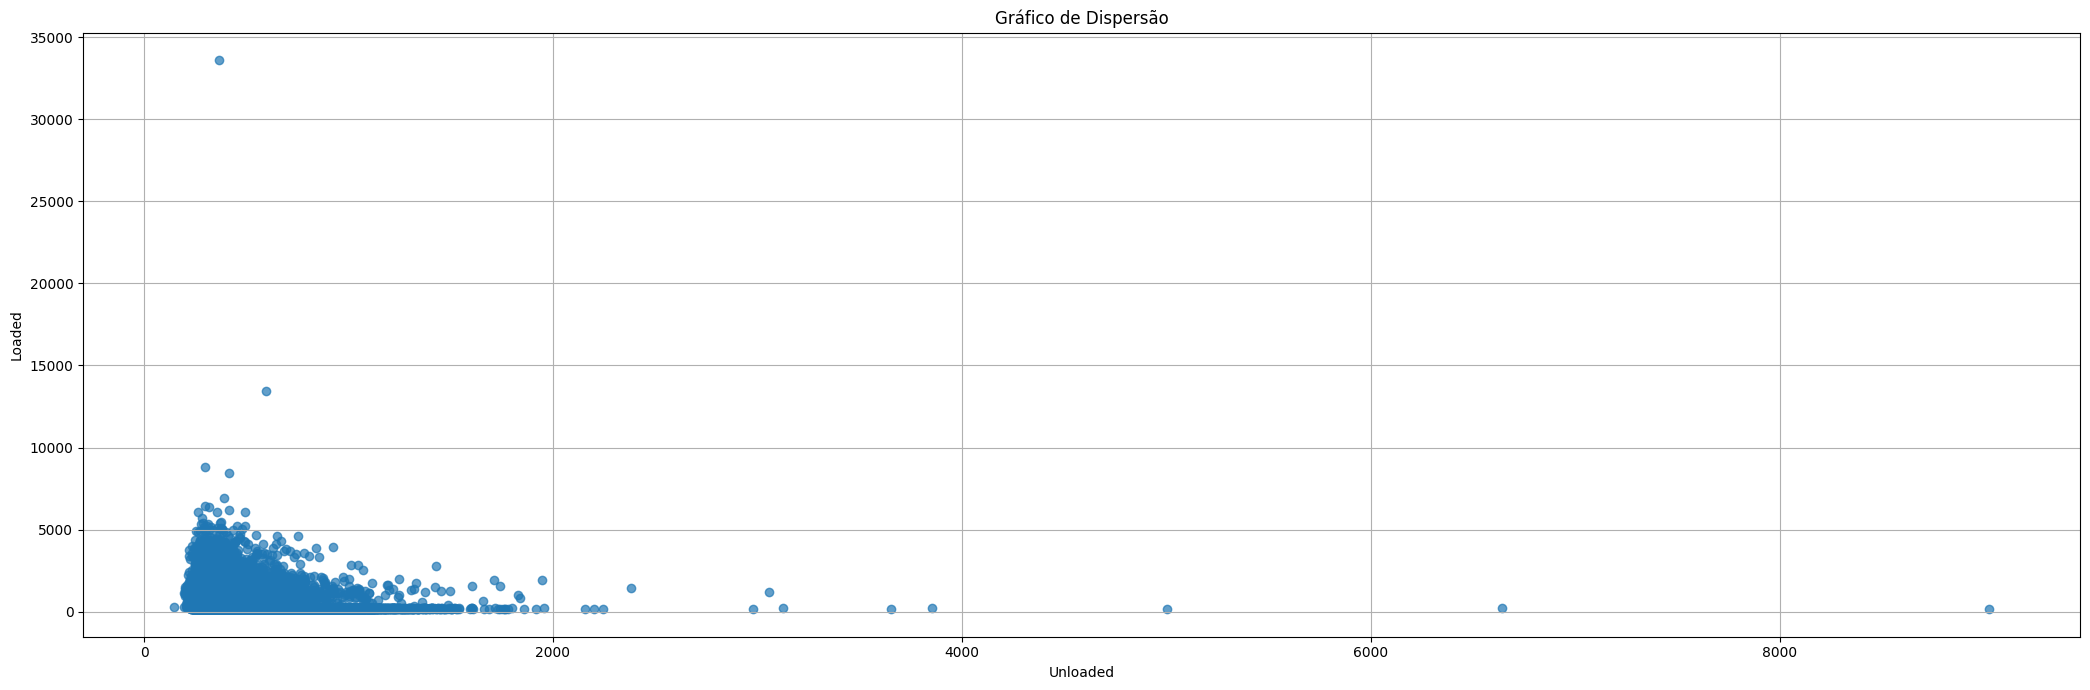

In [36]:
# Plotar as séries temporais
plt.figure(figsize=(21, 7))
plt.plot(time, unloaded, label="Unloaded")
plt.plot(time, loaded, label="Loaded", alpha=0.7)
plt.title("Séries Temporais")
plt.xlabel("Tempo")
plt.ylabel("Valor")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotar o gráfico de dispersão
plt.figure(figsize=(21,7))
plt.scatter(unloaded, loaded, alpha=0.7)
plt.title("Gráfico de Dispersão")
plt.xlabel("Unloaded")
plt.ylabel("Loaded")
plt.grid(True)
plt.tight_layout()
plt.show()

In [37]:
# Correlação de Spearman
spearman_corr, spearman_p = spearmanr(unloaded, loaded)
print(f"Correlação de Spearman: {spearman_corr:.2f}")
print(f"Valor-p de Spearman: {spearman_p:.4f}")

# Correlação de Kendall
kendall_corr, kendall_p = kendalltau(unloaded, loaded)
print(f"Correlação de Kendall: {kendall_corr:.2f}")
print(f"Valor-p de Kendall: {kendall_p:.4f}")

Correlação de Spearman: -0.24
Valor-p de Spearman: 0.0000
Correlação de Kendall: -0.14
Valor-p de Kendall: 0.0000


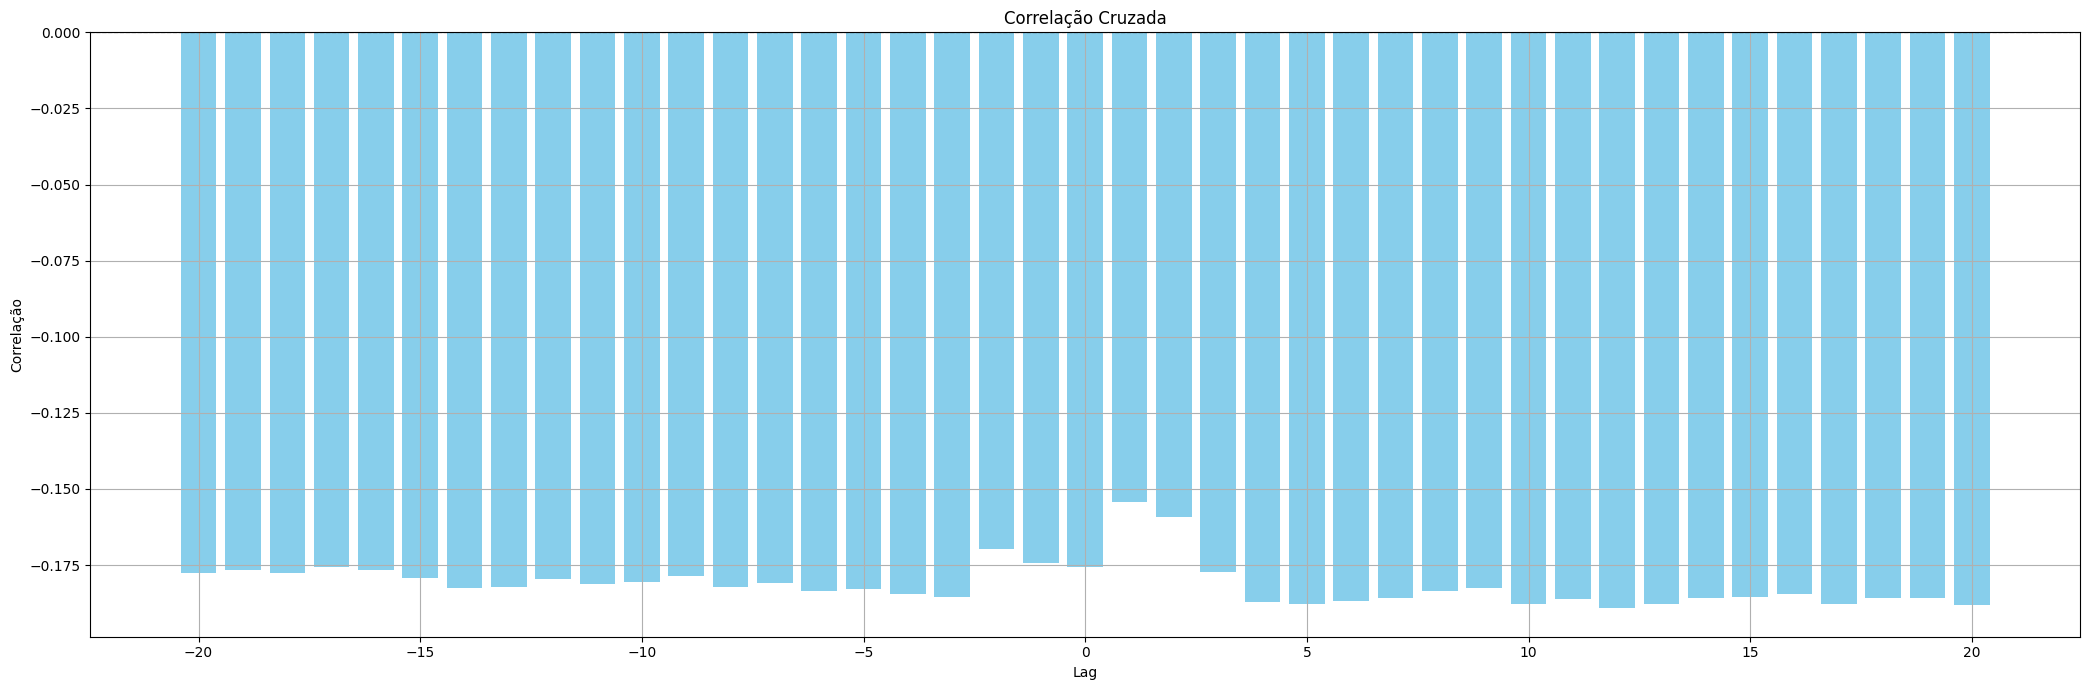

In [38]:
# Definir intervalo de lags
lags = np.arange(-20, 21)  # Ajuste o intervalo de lags

# Função para calcular a correlação cruzada para cada lag
cross_corr = []
for lag in lags:
    if lag < 0:
        shifted_unloaded = unloaded[:lag]  # Trunca o início
        shifted_loaded = loaded[-lag:]    # Trunca o final
    elif lag > 0:
        shifted_unloaded = unloaded[lag:]  # Trunca o final
        shifted_loaded = loaded[:-lag]     # Trunca o início
    else:
        shifted_unloaded = unloaded
        shifted_loaded = loaded

    # Certifique-se de alinhar os índices
    shifted_unloaded = shifted_unloaded.reset_index(drop=True)
    shifted_loaded = shifted_loaded.reset_index(drop=True)

    # Calcular correlação apenas para os índices alinhados
    cross_corr.append(np.corrcoef(shifted_unloaded, shifted_loaded)[0, 1])

# Plotar a correlação cruzada
plt.figure(figsize=(21,7))
plt.bar(lags, cross_corr, color="skyblue")
plt.axhline(0, color="black", linestyle="--", linewidth=0.8)
plt.title("Correlação Cruzada")
plt.xlabel("Lag")
plt.ylabel("Correlação")
plt.grid(True)
plt.tight_layout()
plt.show()


In [39]:
from sklearn.metrics import mutual_info_score

mutual_info = mutual_info_score(unloaded, loaded)
print(f"Informação Mútua: {mutual_info:.4f}")

Informação Mútua: 2.1532


In [40]:
from statsmodels.tsa.api import VAR

model = VAR(unloaded)
results = model.fit()
print(results.summary())

ValueError: Only gave one variable to VAR

<Figure size 2100x700 with 0 Axes>

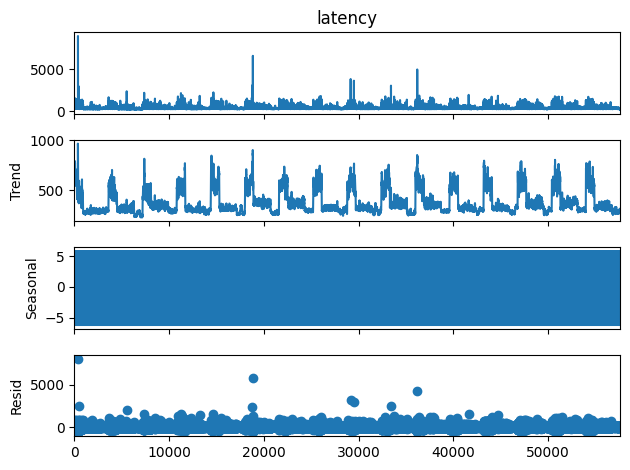

In [43]:
from statsmodels.tsa.seasonal import seasonal_decompose

plt.figure(figsize=(21,7))
decomposition = seasonal_decompose(unloaded, model='additive', period=24)
decomposition.plot()
plt.show()

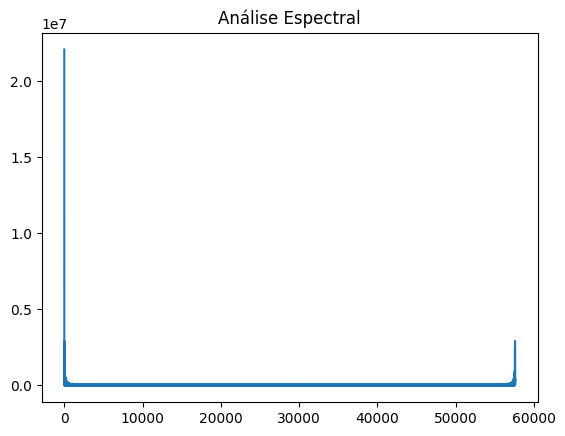

In [44]:
from scipy.fftpack import fft

fft_result = fft(unloaded)
plt.plot(np.abs(fft_result))
plt.title("Análise Espectral")
plt.show()


In [45]:
!pip install tslearn

In [ ]:
from tslearn.metrics import dtw

dtw_distance = dtw(unloaded, loaded)
print(f"Distância DTW: {dtw_distance:.4f}")


In [ ]:
from statsmodels.tsa.stattools import coint

coint_t, p_value, _ = coint(unloaded, loaded)
print(f"Teste de Cointegração: p-value = {p_value:.4f}")